## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import boston_housing
from keras import layers, models, optimizers

## **Datos**

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


### **Normalizamos los datos**

In [4]:
train_data = (train_data - train_data.mean(axis=0) / train_data.std(axis=0))
test_data = (test_data - train_data.mean(axis=0) / train_data.std(axis=0))

## **Red Neuronal**

In [45]:
def build_model_reg(input_data):
  model = models.Sequential()

  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(
    optimizer = optimizers.RMSprop(learning_rate=0.001),
    loss = 'mse',
    metrics=['mae']
  )

  return model

In [73]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80

all_history = []

In [74]:
for i in range(k):
  print(f'Fold: {i+1}')

  val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
  val_labels = train_labels[i*num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0
  )

  partial_train_labels = np.concatenate(
      [train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0
  )

  model = build_model_reg(13)

  history = model.fit(
      partial_train_data, 
      partial_train_labels,
      epochs = num_epochs,
      batch_size = 16,
      validation_data = (val_data, val_labels),
      verbose = 0
  )

  all_history.append(history.history['val_mae'])

Fold: 1
Fold: 2
Fold: 3
Fold: 4


In [75]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

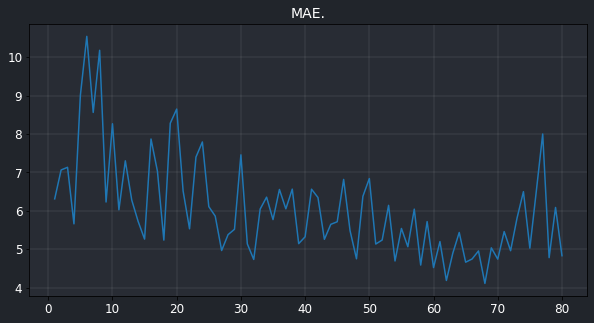

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('MAE.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(range(1, len(all_mae_avg)+1), all_mae_avg)

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.show()

In [77]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 36.7345 - mae: 4.6365


[36.73448944091797, 4.6364569664001465]